<a href="https://colab.research.google.com/github/famkab/AIF360/blob/master/Understanding_Student_Grades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Student Grades Using Statistics and Machine Learning with Python
*by Fatima Abid*



## Grades of Portugese high school students in Mathematics

Credits from [Paulo Cortez, University of Minho, Portugal](https://pcortez.dsi.uminho.pt/)

Dataset available from [UCL Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/student+performance)

Some examples of applications on [Kaggle](https://www.kaggle.com/datasets/dipam7/student-grade-prediction)


### About the dataset:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. This current notebook only refers to the grades in Mathematics.

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### References:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, [ISBN 978-9077381-39-7](http://www3.dsi.uminho.pt/pcortez/student.pdf).

## 0. Importing Packages

We start with importing a few libraries.

In [7]:
import numpy as np # your friend for manipulating numerical data in Python, especially arrays
import pandas as pd # useful for manipulating dataframes and compute basic statistics on them
import matplotlib.pyplot as plt # to plot beautiful graphs
import seaborn as sns # more beautiful graphs (who does not love beautiful graphs?)
from tqdm import tqdm # nice progress bars

import scipy.stats as sps
import pickle as pkl
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [8]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

We can now import the data. 

In [9]:
import pandas as pd

df = pd.read_csv('student-mat.csv', sep=';')
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


## 1. Have a look at the data

**Attribute Information:**

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)

**Grades in mathematics:**

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)




In [10]:
# df = pd.read_csv('dataset_portuguese_students.csv')
df.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
print(f"Length: {len(df)}")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")

Length: 395
Shape: (395, 33)
Columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### 1.1. Descriptive statistics

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df["age"].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [15]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [13]:
# calculation of the mean (e.g. for age)
mean_age = df["age"].mean()
print(mean_age)
# let's round the result
print(round(mean_age,2))

# calculation of the mode (most common value)
mode_age = df["age"].mode()
print(mode_age)

# calculation of the median
med_age = df["age"].median()
print(med_age)

# use a function to print a text with the output
print(f"The mean age of the students is {round(mean_age,2)}")

16.696202531645568
16.7
0    16
dtype: int64
17.0
The mean age of the students is 16.7


### 1.2 Data visualization

#### Data distribution

How many girls and boys for each age?

=> Kernel density estimate with Seaborn

https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde

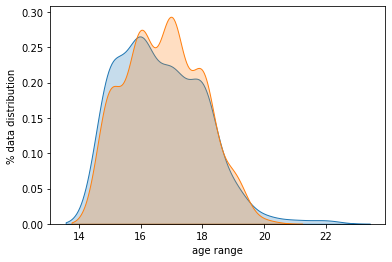

In [14]:
sns.kdeplot(df.groupby('sex').get_group('M')['age'], shade = True, label = 'male', legend = True)
sns.kdeplot(df.groupby('sex').get_group('F')['age'], shade = True, label = 'female', legend = True)
plt.xlabel('age range')
plt.ylabel('% data distribution')
plt.show()

We can plot proportions as well, using histograms.

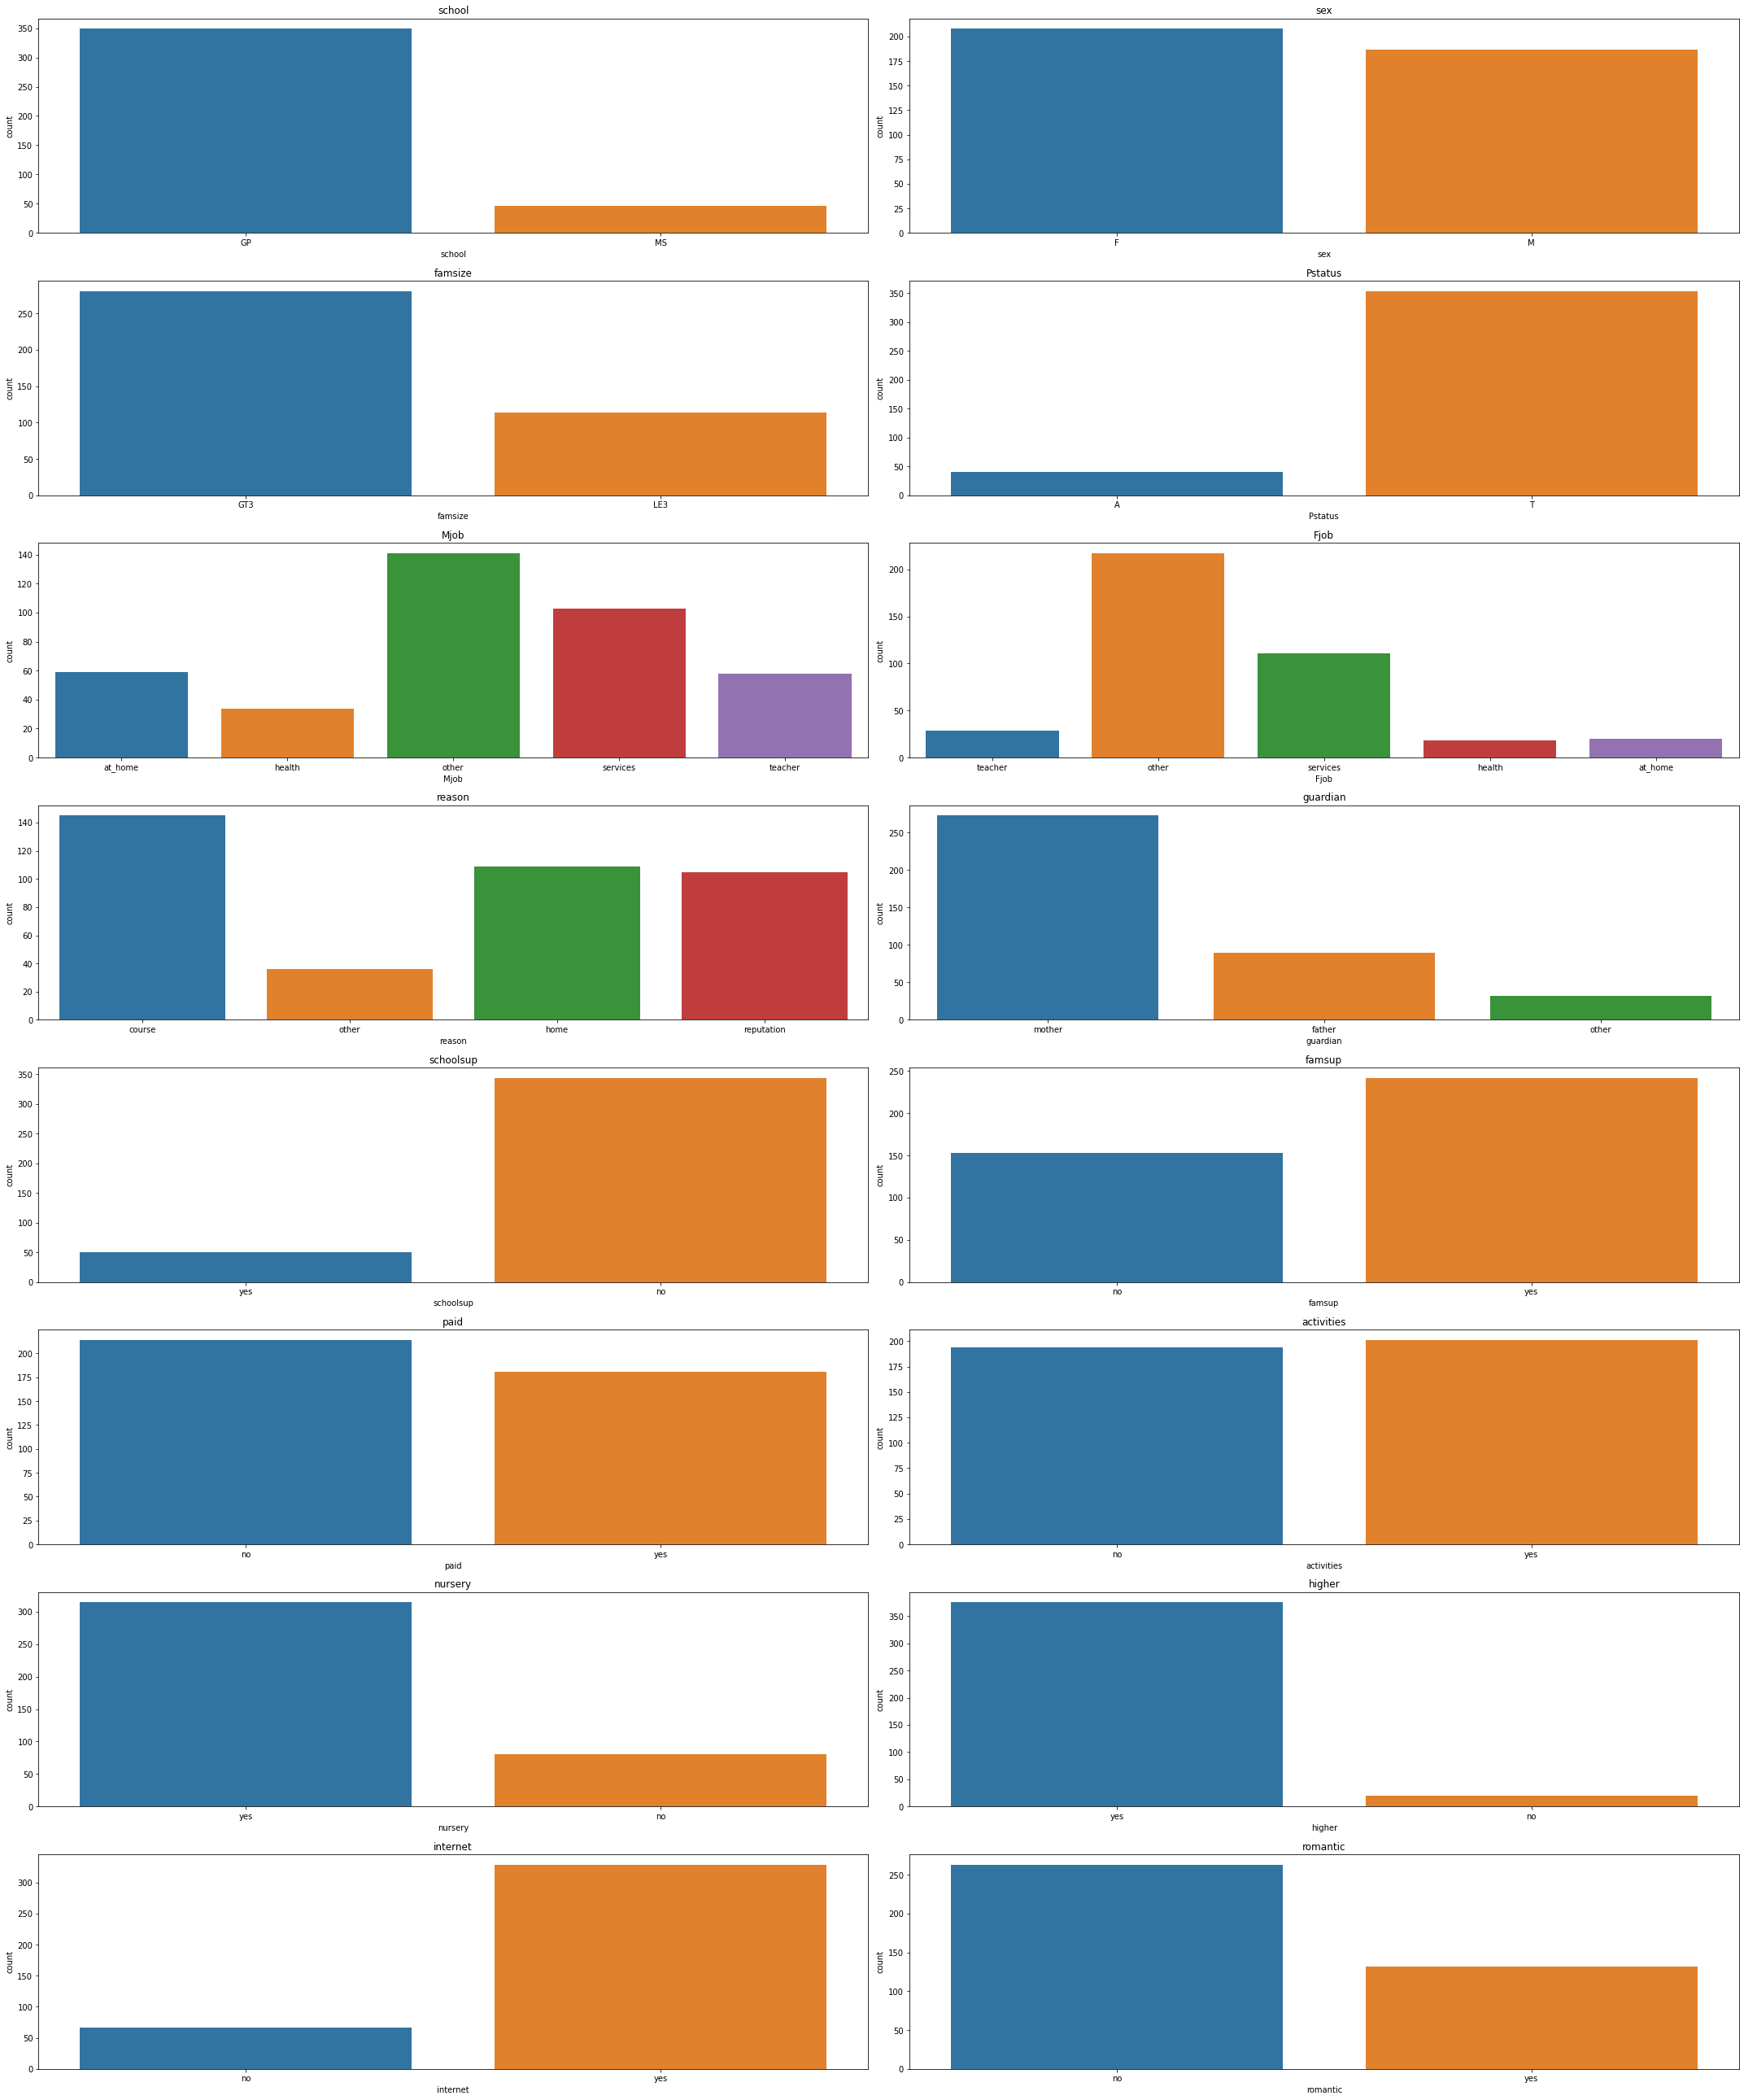

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize = (30,40))
for i, item in enumerate(['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']):
    plt.subplot(9,2,i+1)
    plt.tight_layout() 
    sns.countplot(df[item])
    plt.title(item)
plt.show()

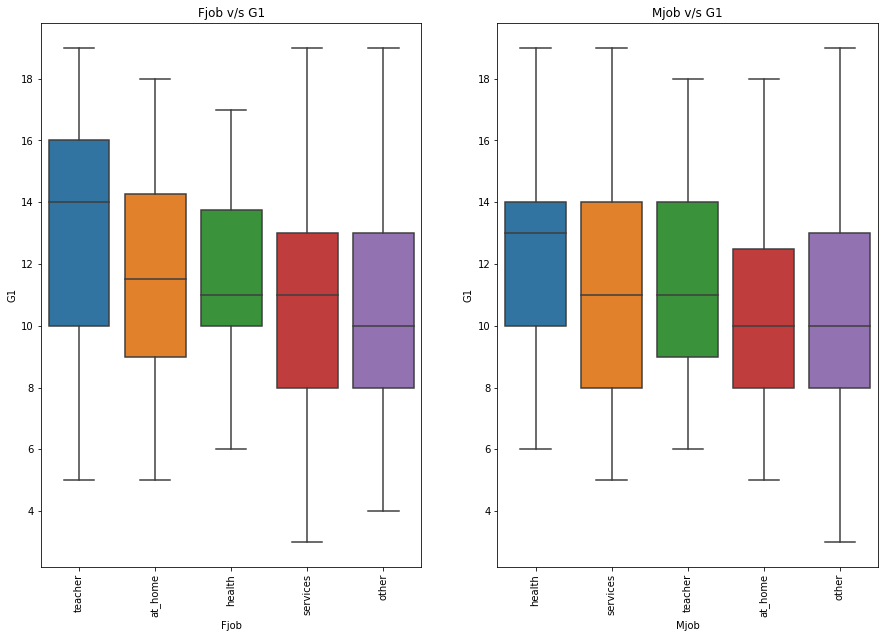

In [ ]:
# Using box-and whisker plots to visualise the central tendancies and deviations

plt.figure(figsize= (15,10))
plt.subplot(1,2,1)
order_by = df.groupby('Fjob')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Fjob'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Fjob v/s G1')

plt.subplot(1,2,2)
order_by = df.groupby('Mjob')['G1'].median().sort_values(ascending = False).index
sns.boxplot(x = df['Mjob'], y = df['G1'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Mjob v/s G1')

plt.show()

#### Variable Correlation

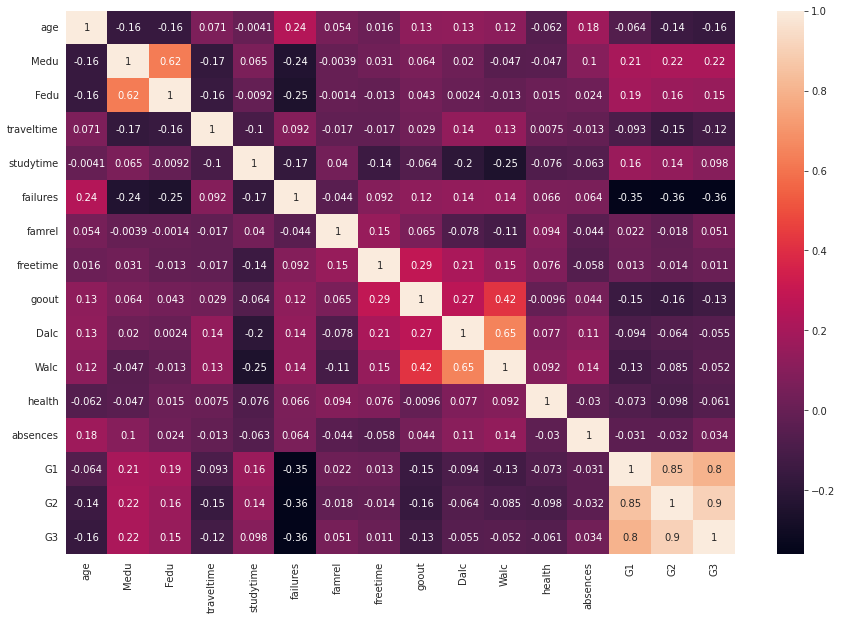

In [ ]:
# Setting seaborn style and color palette
sns.set_style('darkgrid')
sns.set_palette("hls")
# Compute correlation matrix
corr = df.corr()
# Plot the result
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [16]:
best_features=['studytime','failures', 'absences', 'G1', 'G2']

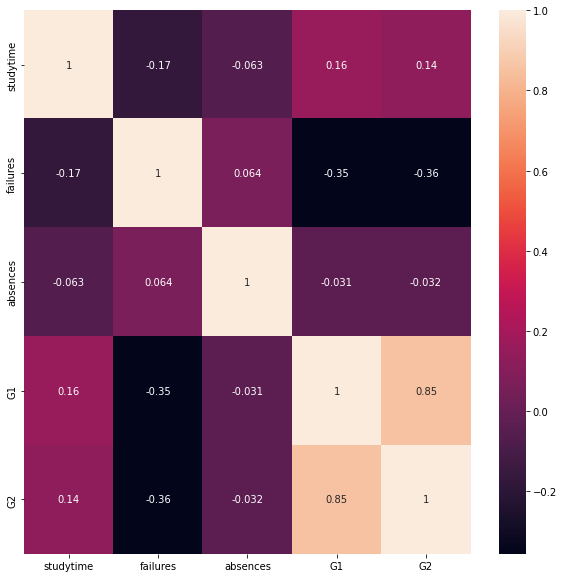

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df[best_features].corr(),annot=True,cbar=True)

In [19]:
df.corr()['G1']

age          -0.064081
Medu          0.205341
Fedu          0.190270
traveltime   -0.093040
studytime     0.160612
failures     -0.354718
famrel        0.022168
freetime      0.012613
goout        -0.149104
Dalc         -0.094159
Walc         -0.126179
health       -0.073172
absences     -0.031003
G1            1.000000
G2            0.852118
G3            0.801468
Name: G1, dtype: float64

In [20]:
df.groupby('higher')['G1'].count()

higher
no      20
yes    375
Name: G1, dtype: int64

In [21]:
df.groupby('higher')['G1'].mean()

higher
no      8.350000
yes    11.045333
Name: G1, dtype: float64

In [22]:
df.groupby('higher')['G1'].std()

higher
no     2.942877
yes    3.285940
Name: G1, dtype: float64

In [23]:
df.groupby('school')['G1'].mean()

school
GP    10.939828
MS    10.673913
Name: G1, dtype: float64

In [24]:
df.groupby('school')['G1'].count()

school
GP    349
MS     46
Name: G1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


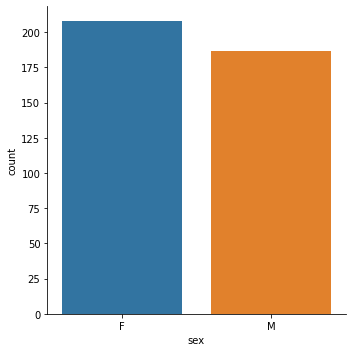

In [26]:
sns.catplot('sex',data=df,kind='count')

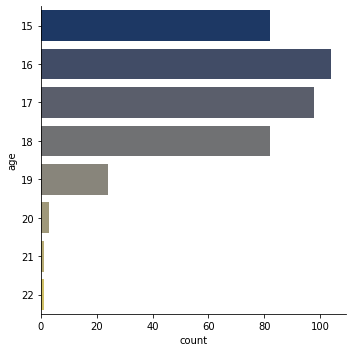

In [27]:
sns.catplot(y='age',data=df,kind='count',palette='cividis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


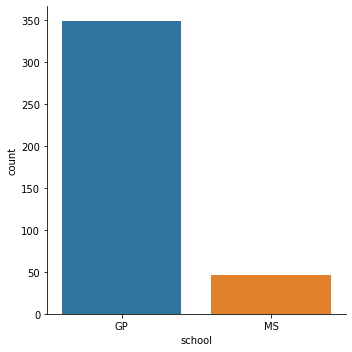

In [28]:
sns.catplot('school',data=df,kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


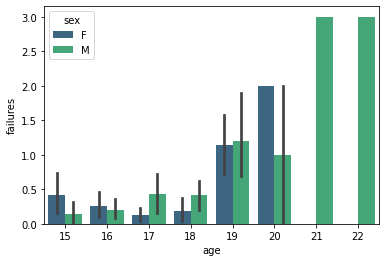

In [29]:
sns.barplot(df['age'],df['failures'],hue= df['sex'],palette='viridis')

## 2. Machine Learning with Scikit-learn

### 2.1. Preprocessing

We need to do some work with this dataset to make it ready for machine learning.

In [ ]:
# Import more libraries

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder

from yellowbrick.classifier import ClassificationReport
from yellowbrick.target import ClassBalance
from yellowbrick.model_selection import FeatureImportances

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

import plotly.express as px

In [ ]:
#This code will change our dataset into only numbers

categorical = df.dtypes=='object'
categorical_list = list(categorical[categorical].index)

def labelfix(variable):
    le = LabelEncoder()
    le_variable = le.fit_transform(df[variable])
    df[variable] = le_variable

for i in categorical_list:
    labelfix(i)


### 2.2. Clustering using K-means

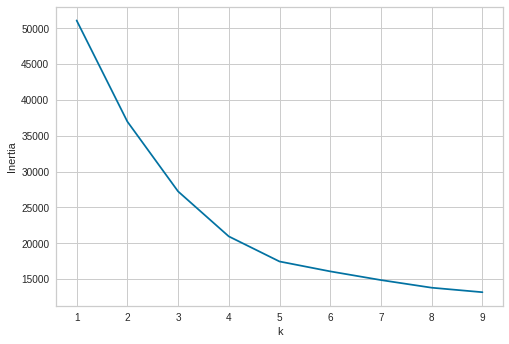

In [ ]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    inertia.append(kmeanModel.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# kmeans5 = KMeans(n_clusters=5, random_state=0)
# cluster = kmeans5.fit(df)

# df2 = df.copy()
# df2['Classification_5']= cluster.labels_
# df2[['Classification_5']]

In [ ]:
fig = px.scatter_3d(df2, 
                    y='G1', 
                    x='G2', 
                    z='G3', 
                    size='absences', 
                    color='freetime',
                    color_continuous_scale=px.colors.sequential.RdBu,
                    hover_data=['age']
                   )
fig.update_layout(scene_zaxis_type="log")
fig.show()

fig = px.scatter_3d(df2, 
                    y='G1', 
                    x='G2', 
                    z='G3', 
                    size='absences', 
                    color='Classification_5',
                    color_continuous_scale=px.colors.sequential.RdBu,
                    hover_data=['age']
                   )
fig.update_layout(scene_zaxis_type="log")
fig.show()

In [33]:
from sklearn.model_selection import train_test_split

#Split Data

X=df[best_features]
y=df['G3']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=20,shuffle=True)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'Accuracy: {round(r2_score(y_test , pred),3)*100}%')

MSE: 2.756708941402211
Accuracy: 86.2%
